In [79]:
# http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-III-Dimensionality-reduction-via-Sequential-feature-selection-Assessing-feature-importance-via-random-forests.php

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines','Proline']

In [3]:
print('Class labels', np.unique(df_wine['Class label']))

('Class labels', array([1, 2, 3]))


In [4]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [6]:
df_wine.iloc[:, 0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [7]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
len(X_test), len(X_train)

(54, 124)

In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [10]:
X_train_norm[0]

array([ 0.72043011,  0.20378151,  0.53763441,  0.30927835,  0.33695652,
        0.54316547,  0.73700306,  0.25      ,  0.40189873,  0.24068768,
        0.48717949,  1.        ,  0.5854251 ])

In [11]:
X_test_norm[0]

array([ 0.72849462,  0.16386555,  0.47849462,  0.29896907,  0.52173913,
        0.53956835,  0.74311927,  0.13461538,  0.37974684,  0.4364852 ,
        0.32478632,  0.70695971,  0.60566802])

In [12]:
X_train_norm[0]

array([ 0.72043011,  0.20378151,  0.53763441,  0.30927835,  0.33695652,
        0.54316547,  0.73700306,  0.25      ,  0.40189873,  0.24068768,
        0.48717949,  1.        ,  0.5854251 ])

In [13]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [14]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

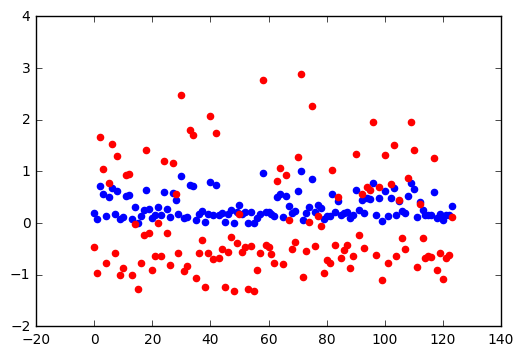

In [15]:
xx = np.arange(len(X_train_std))
yy1 = X_train_norm[:,1]
yy2 = X_train_std[:,1]
scatter(xx, yy1, color='b')
scatter(xx, yy2, color='r')

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train_std, y_train)
print('Training accuracy:', logi_regr.score(X_train_std, y_train))
print('Test accuracy:', logi_regr.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.98148148148148151)


In [19]:
logi_regr.intercept_

array([-0.38378483, -0.15813848, -0.70041692])

In [20]:
logi_regr.coef_

array([[ 0.2800255 ,  0.        ,  0.        , -0.02812699,  0.        ,
         0.        ,  0.70979036,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23648995],
       [-0.64375668, -0.06890282, -0.05718032,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92728386,
         0.0597681 ,  0.        , -0.37098918],
       [ 0.        ,  0.06152701,  0.        ,  0.        ,  0.        ,
         0.        , -0.63606536,  0.        ,  0.        ,  0.49812758,
        -0.35816606, -0.57119732,  0.        ]])

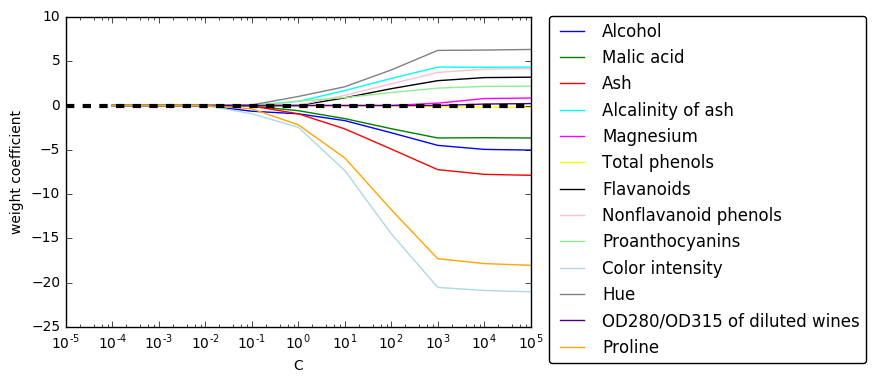

In [21]:
fig = figure()
ax = subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
'magenta', 'yellow', 'black',
'pink', 'lightgreen', 'lightblue',
'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1',
            C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plot(params, weights[:, column],
        label=df_wine.columns[column+1], color=color)
axhline(0, color='black', linestyle='--', linewidth=3)
xlim([10**(-5), 10**5])
ylabel('weight coefficient')
xlabel('C')
xscale('log')
legend(loc='upper left')
legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
show()

In [22]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

<__main__.SBS instance at 0x7fc41c93a488>

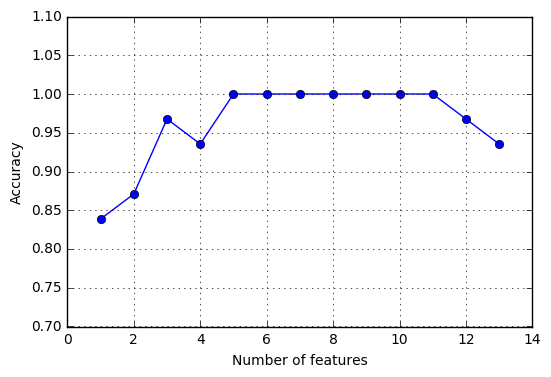

In [25]:
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
ylim([0.7, 1.1])
ylabel('Accuracy')
xlabel('Number of features')
grid()
show()

In [26]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [27]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 8, 10, 12),
 (0, 1, 2, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 10, 12),
 (0, 1, 3, 10, 12),
 (0, 1, 10, 12),
 (0, 1, 10),
 (0, 10),
 (0,)]

In [28]:
sbs.subsets_[8]

(0, 1, 3, 10, 12)

In [29]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.94444444444444442)


In [30]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

('Training accuracy:', 0.95967741935483875)
('Test accuracy:', 0.96296296296296291)


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
df_wine.columns[1:]

Index([u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash', u'Magnesium',
       u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')

In [33]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))


 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


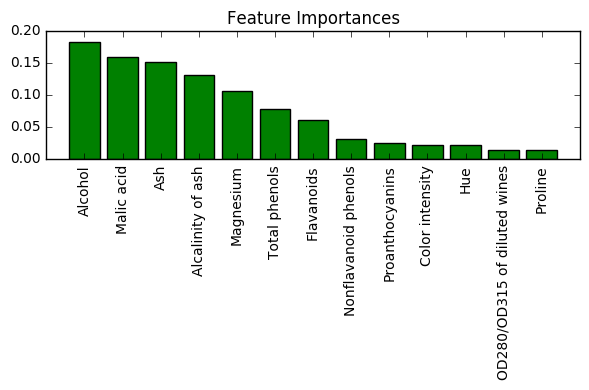

In [35]:
title('Feature Importances')
bar(range(X_train.shape[1]), importances[indices], 
                     color='green', align='center')
xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
xlim([-1, X_train.shape[1]])
tight_layout()
show()